In [124]:
import numpy as np

In [125]:
import matplotlib.pyplot as plt

In [126]:
import pandas as pd

In [127]:
import seaborn as sns

In [128]:
df=pd.read_csv('data.csv',error_bad_lines=False,warn_bad_lines=False)

Сырые данные имели плохие строки и мы их пропустили,а так же выключили предупреждения,так как очень глаза мозолит 

In [129]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


Тут можно увидеть какие у нас приблизительно данные

In [130]:
len(df['password'])

669640

Можно увидеть,что паролей много,что есть хорошо для статистики

Я полагаю,что нужно добавить какие-то параметры,которые подойдут для обучения.<br>
Из таких параметров я придумал:<br>
1)длина пароля<br>
2)количество символов алфавита<br>
3)количество цифр в пароле<br>
4)количество гласных<br>
5)количество согласных<br>
6)количество специальных символов({!,#,$,@,...})<br>

In [131]:
df['length']=df['password'].apply(lambda x: len(str(x)))

In [135]:
df.head()

,password,strength,length,digits
0,kzde5577,1,8,4
1,kino3434,1,8,4
2,visi7k1yr,1,9,2
3,megzy123,1,8,3
4,lamborghin1,1,11,1


In [136]:
df['digits'] = df['password'].apply(lambda x: len([str(x) for x in list(str(x)) if str(x).isdigit()]))

In [137]:
df.head()

,password,strength,length,digits
0,kzde5577,1,8,4
1,kino3434,1,8,4
2,visi7k1yr,1,9,2
3,megzy123,1,8,3
4,lamborghin1,1,11,1


In [138]:
df['alphas'] = df['password'].apply(lambda x: len([x for x in list(str(x)) if x.isalpha()]))

In [139]:
df.head()

,password,strength,length,digits,alphas
0,kzde5577,1,8,4,4
1,kino3434,1,8,4,4
2,visi7k1yr,1,9,2,7
3,megzy123,1,8,3,5
4,lamborghin1,1,11,1,10


In [140]:
vowels = ['a', 'e', 'i', 'o', 'u', 'y']

In [141]:
df['vowels'] = df['password'].apply(lambda x: len([x for x in list(str(x)) if x in vowels]))

In [142]:
df.head()

,password,strength,length,digits,alphas,vowels
0,kzde5577,1,8,4,4,1
1,kino3434,1,8,4,4,2
2,visi7k1yr,1,9,2,7,3
3,megzy123,1,8,3,5,2
4,lamborghin1,1,11,1,10,3


In [143]:
df['consonants'] = df['password'].apply(lambda x: len([x for x in list(str(x)) if x not in vowels and x.isalpha()]))

In [144]:
df.head()

,password,strength,length,digits,alphas,vowels,consonants
0,kzde5577,1,8,4,4,1,3
1,kino3434,1,8,4,4,2,2
2,visi7k1yr,1,9,2,7,3,4
3,megzy123,1,8,3,5,2,3
4,lamborghin1,1,11,1,10,3,7


In [145]:
df['spec_symbols']=df['password'].apply(lambda x: len([x for x in list(str(x)) if ((not x.isalpha()) and (not x.isdigit()))]))

In [146]:
df.loc[df['spec_symbols']>0].head()

,password,strength,length,digits,alphas,vowels,consonants,spec_symbols
20,elyass15@ajilent-ci,2,19,2,15,7,8,2
22,klara-tershina3H,2,16,1,14,5,9,1
44,olmaz.,0,6,0,5,2,3,1
50,ok>bdk,0,6,0,5,1,4,1
60,khmer100.03278&?><Mnb,2,21,8,8,1,7,5


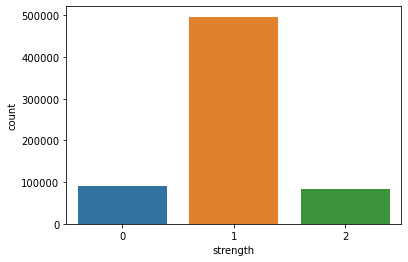

In [147]:
sns.countplot(df['strength'])


Можно увидеть,что большинство паролей стойкие

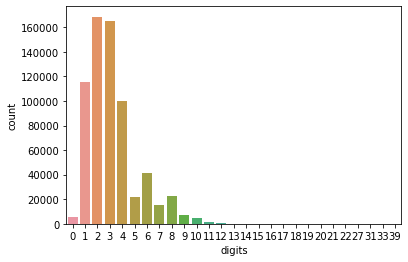

In [148]:
sns.countplot(df['digits'])

Похоже на нормальное распределение Гаусса и можно увидеть,что в среденем пароли имеют в себе две цифры.

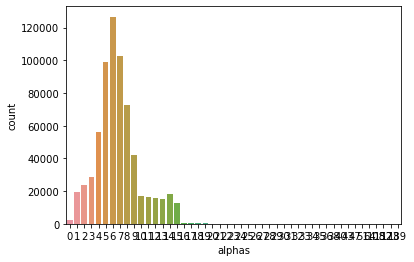

In [149]:
sns.countplot(df['alphas'])

Тут тоже что-то похожее на распределение Гаусса и в среднем пароли имеют 6 символов.

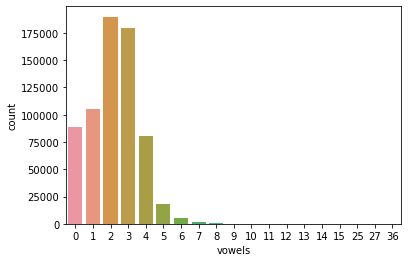

In [150]:
sns.countplot(df['vowels'])

В среднем пароли имеют 2 гласных буквы

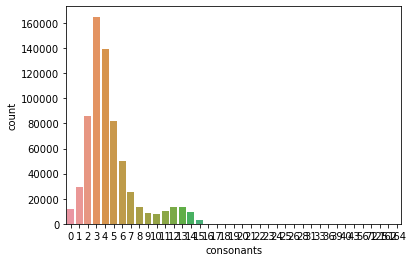

In [151]:
sns.countplot(df['consonants'])

А тут можно увидеть что чаще всего пароль имеет 3 согласных буквы

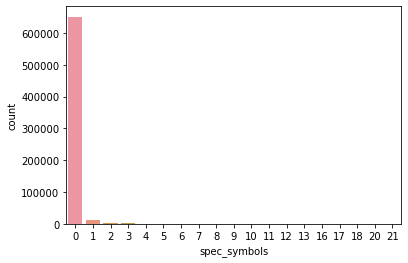

In [152]:
sns.countplot(df['spec_symbols'])

Можно увидеть,что в большенстве паролей нет специальных символов

### Вобщем,мы сформировали необходимый нам датасет для построения модели.

In [179]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [180]:
y=df['strength']
X=df.drop('password',axis=1)
X=X.drop('strength',axis=1)

Класифицируем strength и формируем входные данные 

In [181]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: strength, dtype: int64

In [182]:
X.head()

,length,digits,alphas,vowels,consonants,spec_symbols
0,8,4,4,1,3,0
1,8,4,4,2,2,0
2,9,2,7,3,4,0
3,8,3,5,2,3,0
4,11,1,10,3,7,0


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=np.random)

In [191]:
mlp1=MLPClassifier(hidden_layer_sizes=(20,15,10,5),activation='logistic',random_state=1, max_iter=100, verbose=True)

In [201]:
mlp1.fit(X_train,y_train)

Iteration 1, loss = 0.60253311
Iteration 2, loss = 0.38392728
Iteration 3, loss = 0.21592935
Iteration 4, loss = 0.01137030
Iteration 5, loss = 0.00285536
Iteration 6, loss = 0.00106550
Iteration 7, loss = 0.00054502
Iteration 8, loss = 0.00035969
Iteration 9, loss = 0.00032150
Iteration 10, loss = 0.00023761
Iteration 11, loss = 0.00023313
Iteration 12, loss = 0.00022518
Iteration 13, loss = 0.00046651
Iteration 14, loss = 0.00020922
Iteration 15, loss = 0.00020809
Iteration 16, loss = 0.00020597
Iteration 17, loss = 0.00020036
Iteration 18, loss = 0.00038830
Iteration 19, loss = 0.00019292
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 15, 10, 5),
              max_iter=100, random_state=1, verbose=True)

In [202]:
y_pred1=mlp1.predict(X_test)

In [203]:
balanced_accuracy_score(y_test,y_pred1)

1.0

In [204]:
y_test

414663    1
607757    1
588134    0
347619    1
57416     1
         ..
404037    1
106177    1
129558    1
622584    1
650987    0
Name: strength, Length: 167410, dtype: int64

In [205]:
y_pred1

array([1, 1, 0, ..., 1, 1, 0])

In [206]:
mlp2=MLPClassifier(hidden_layer_sizes=(3,10,2),activation='tanh',random_state=1, max_iter=100, verbose=True)

In [207]:
mlp2.fit(X_train,y_train)

Iteration 1, loss = 0.34648760
Iteration 2, loss = 0.01898099
Iteration 3, loss = 0.00419847
Iteration 4, loss = 0.00142546
Iteration 5, loss = 0.00041867
Iteration 6, loss = 0.00016491
Iteration 7, loss = 0.00008852
Iteration 8, loss = 0.00006785
Iteration 9, loss = 0.00065647
Iteration 10, loss = 0.00006186
Iteration 11, loss = 0.00006111
Iteration 12, loss = 0.00006080
Iteration 13, loss = 0.00106505
Iteration 14, loss = 0.00006204
Iteration 15, loss = 0.00006113
Iteration 16, loss = 0.00006064
Iteration 17, loss = 0.00006030
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', hidden_layer_sizes=(3, 10, 2), max_iter=100,
              random_state=1, verbose=True)

In [208]:
y_pred2=mlp2.predict(X_test)

In [209]:
balanced_accuracy_score(y_test,y_pred2)

1.0

In [210]:
mlp3=MLPClassifier(hidden_layer_sizes=(7),activation='relu',random_state=1, max_iter=100, verbose=True)

In [211]:
mlp3.fit(X_train,y_train)

Iteration 1, loss = 0.47973435
Iteration 2, loss = 0.17640285
Iteration 3, loss = 0.05710392
Iteration 4, loss = 0.02507447
Iteration 5, loss = 0.01280465
Iteration 6, loss = 0.00749653
Iteration 7, loss = 0.00466163
Iteration 8, loss = 0.00306068
Iteration 9, loss = 0.00210561
Iteration 10, loss = 0.00147773
Iteration 11, loss = 0.00107899
Iteration 12, loss = 0.00081360
Iteration 13, loss = 0.00061716
Iteration 14, loss = 0.00048140
Iteration 15, loss = 0.00035197
Iteration 16, loss = 0.00022412
Iteration 17, loss = 0.00020048
Iteration 18, loss = 0.00017479
Iteration 19, loss = 0.00016157
Iteration 20, loss = 0.00015164
Iteration 21, loss = 0.00014355
Iteration 22, loss = 0.00013594
Iteration 23, loss = 0.00012862
Iteration 24, loss = 0.00012193
Iteration 25, loss = 0.00011530
Iteration 26, loss = 0.00011038
Iteration 27, loss = 0.00010512
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=7, max_iter=100, random_state=1, verbose=True)

In [212]:
y_pred3=mlp3.predict(X_test)

In [213]:
balanced_accuracy_score(y_test,y_pred3)

1.0